## Portfolio Exercise: Starbucks
<br>

<img src="https://opj.ca/wp-content/uploads/2018/02/New-Starbucks-Logo-1200x969.jpg" width="200" height="200">
<br>
<br>
 
#### Background Information

The dataset you will be provided in this portfolio exercise was originally used as a take-home assignment provided by Starbucks for their job candidates. The data for this exercise consists of about 120,000 data points split in a 2:1 ratio among training and test files. In the experiment simulated by the data, an advertising promotion was tested to see if it would bring more customers to purchase a specific product priced at $10. Since it costs the company 0.15 to send out each promotion, it would be best to limit that promotion only to those that are most receptive to the promotion. Each data point includes one column indicating whether or not an individual was sent a promotion for the product, and one column indicating whether or not that individual eventually purchased that product. Each individual also has seven additional features associated with them, which are provided abstractly as V1-V7.

#### Optimization Strategy

Your task is to use the training data to understand what patterns in V1-V7 to indicate that a promotion should be provided to a user. Specifically, your goal is to maximize the following metrics:

* **Incremental Response Rate (IRR)** 

IRR depicts how many more customers purchased the product with the promotion, as compared to if they didn't receive the promotion. Mathematically, it's the ratio of the number of purchasers in the promotion group to the total number of customers in the purchasers group (_treatment_) minus the ratio of the number of purchasers in the non-promotional group to the total number of customers in the non-promotional group (_control_).

$$ IRR = \frac{purch_{treat}}{cust_{treat}} - \frac{purch_{ctrl}}{cust_{ctrl}} $$


* **Net Incremental Revenue (NIR)**

NIR depicts how much is made (or lost) by sending out the promotion. Mathematically, this is 10 times the total number of purchasers that received the promotion minus 0.15 times the number of promotions sent out, minus 10 times the number of purchasers who were not given the promotion.

$$ NIR = (10\cdot purch_{treat} - 0.15 \cdot cust_{treat}) - 10 \cdot purch_{ctrl}$$

For a full description of what Starbucks provides to candidates see the [instructions available here](https://drive.google.com/open?id=18klca9Sef1Rs6q8DW4l7o349r8B70qXM).

Below you can find the training data provided.  Explore the data and different optimization strategies.

#### How To Test Your Strategy?

When you feel like you have an optimization strategy, complete the `promotion_strategy` function to pass to the `test_results` function.  
From past data, we know there are four possible outomes:

Table of actual promotion vs. predicted promotion customers:  

<table>
<tr><th></th><th colspan = '2'>Actual</th></tr>
<tr><th>Predicted</th><th>Yes</th><th>No</th></tr>
<tr><th>Yes</th><td>I</td><td>II</td></tr>
<tr><th>No</th><td>III</td><td>IV</td></tr>
</table>

The metrics are only being compared for the individuals we predict should obtain the promotion – that is, quadrants I and II.  Since the first set of individuals that receive the promotion (in the training set) receive it randomly, we can expect that quadrants I and II will have approximately equivalent participants.  

Comparing quadrant I to II then gives an idea of how well your promotion strategy will work in the future. 

Get started by reading in the data below.  See how each variable or combination of variables along with a promotion influences the chance of purchasing.  When you feel like you have a strategy for who should receive a promotion, test your strategy against the test dataset used in the final `test_results` function.

In [70]:
# load in packages
from itertools import combinations

from test_results import test_results, score
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk

import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# load in the data
train_data = pd.read_csv('./training.csv')
train_data.head()

,ID,Promotion,purchase,V1,V2,V3,V4,V5,V6,V7
0,1,No,0,2,30.443518,-1.165083,1,1,3,2
1,3,No,0,3,32.159350,-0.645617,2,3,2,2
2,4,No,0,2,30.431659,0.133583,1,1,4,2
3,5,No,0,0,26.588914,-0.212728,2,1,4,2
4,8,Yes,0,3,28.044332,-0.385883,1,1,2,2


In [71]:
# Cells for you to work and document as necessary - 
# definitely feel free to add more cells as you need

In [72]:
train_data['Promotion'].value_counts()

Yes    42364
No     42170
Name: Promotion, dtype: int64

In [73]:
train_data['purchase'].value_counts()

0    83494
1     1040
Name: purchase, dtype: int64

In [74]:
# part 1:  EDA

In [75]:
#Step 1: Understanding the Distribution of Features (V1-V7) and the purchase Variable

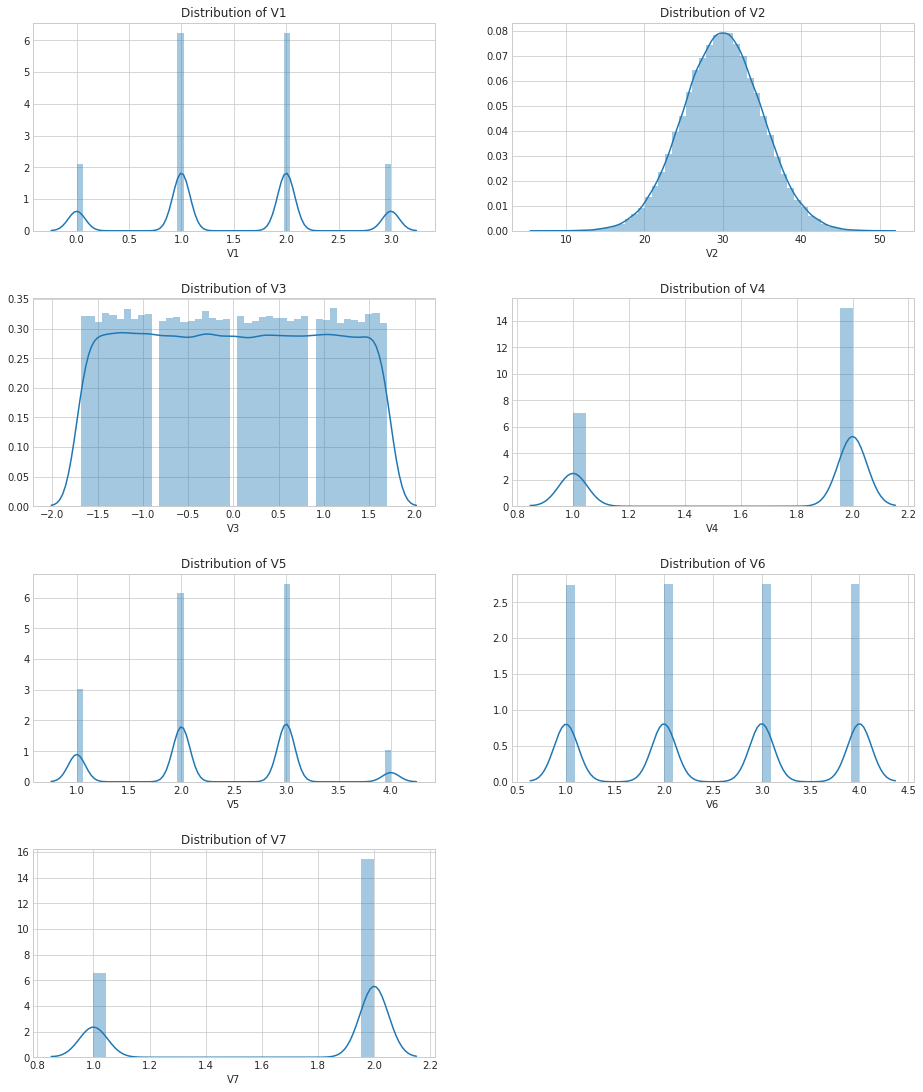

In [76]:
#Code for Visualizing the Distributions of Features V1-V7:
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns  # Ensure seaborn is imported as sns

# Check seaborn version to decide which plot function to use
from distutils.version import LooseVersion
use_histplot = LooseVersion(sns.__version__) >= LooseVersion("0.11.0")

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting distributions of features V1-V7
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 16))
fig.tight_layout(pad=5.0)

# List of features for plotting
features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7']

for i, feature in enumerate(features):
    row, col = divmod(i, 2)
    if use_histplot:
        sns.histplot(train_data[feature], kde=True, ax=axes[row, col]).set_title(f'Distribution of {feature}')
    else:
        sns.distplot(train_data[feature], kde=True, ax=axes[row, col]).set_title(f'Distribution of {feature}')

# Remove the empty subplot (if any)
if len(features) % 2 != 0:
    fig.delaxes(axes.flatten()[-1])

plt.show()



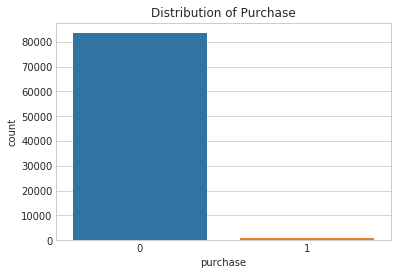

In [77]:
sns.countplot(x='purchase', data=train_data).set_title('Distribution of Purchase')
plt.show()


In [78]:
# Step 2: Analyzing the Impact of Promotions on Purchase

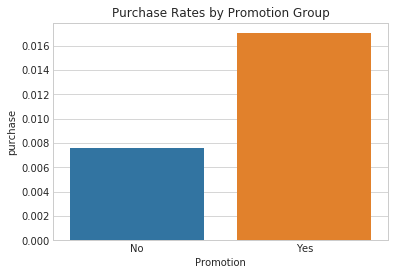

In [79]:
# Calculating purchase rates
purchase_rates = train_data.groupby('Promotion')['purchase'].mean().reset_index()

# Visualizing the purchase rates
sns.barplot(x='Promotion', y='purchase', data=purchase_rates).set_title('Purchase Rates by Promotion Group')
plt.show()


In [80]:
#Step 3: Correlation Analysis

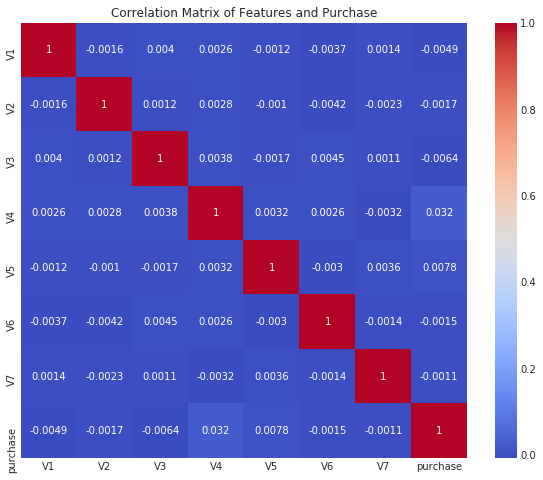

In [81]:
# Calculating correlation matrix
corr_matrix = train_data[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'purchase']].corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm').set_title('Correlation Matrix of Features and Purchase')
plt.show()


In [82]:
# Part 2: Developing the Promotion Strategy Function

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Prepare the data
X = train_data[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7']]
y = train_data['purchase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally, scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Select and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

def promotion_strategy(df):
    '''
    INPUT 
    df - a dataframe with *only* the columns V1 - V7 (same as train_data)

    OUTPUT
    promotion_df - np.array with the values
                   'Yes' or 'No' related to whether or not an 
                   individual should recieve a promotion 
                   should be the length of df.shape[0]
                
    Ex:
    INPUT: df
    
    V1	V2	  V3	V4	V5	V6	V7
    2	30	-1.1	1	1	3	2
    3	32	-0.6	2	3	2	2
    2	30	0.13	1	1	4	2
    
    OUTPUT: promotion
    
    array(['Yes', 'Yes', 'No'])
    indicating the first two users would recieve the promotion and 
    the last should not.
    '''
    # Your model prediction logic here
    # For example, use the trained model to predict the purchase probability
    # Then, decide to send a promotion based on a certain probability threshold
    
    # Assuming df is already scaled if scaling was applied
    predictions = model.predict(df)
    
    # Decide on a threshold for sending promotions
    threshold = 0.5  # This is an example; adjust based on your strategy
    promotion = np.where(predictions >= threshold, 'Yes', 'No')
    
    
    
    
    return promotion

In [84]:
# This will test your results, and provide you back some information 
# on how well your promotion_strategy will work in practice

test_results(promotion_strategy)

Nice job!  See how well your strategy worked on our test data below!

Your irr with this strategy is 0.0002.

Your nir with this strategy is -37.05.
We came up with a model with an irr of 0.0188 and an nir of 189.45 on the test set.

 How did you do?


(0.00019433198380566785, -37.049999999999997)

In [64]:
# Conclusion:
# The results indicate that the strategy implemented has a very low Incremental Response Rate (IRR) of 0.0002 and a negative Net Incremental Revenue (NIR) of -37.05. This suggests that the strategy is not effectively targeting the right individuals for the promotion, leading to minimal incremental purchases and a loss in terms of revenue when considering the cost of sending out promotions. 

In [65]:
# part 3: Selecting important features the model

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Prepare the data with only the selected features
X = train_data[['V1','V2', 'V3', 'V4', 'V5']]
y = train_data['purchase']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [96]:
def promotion_strategy(df):
    '''
    INPUT 
    df - a dataframe with *only* the columns V1 - V7 (same as train_data)
    
    OUTPUT
    promotion_df - np.array with the values 'Yes' or 'No' 
    '''
    # Selecting the relevant features and applying the same scaling
    selected_features_df = df[['V1','V2','V3', 'V4', 'V5']]
    selected_features_scaled = scaler.transform(selected_features_df)
    
    # Using predict_proba to get the probability of class 1 (purchase)
    probabilities = model.predict_proba(selected_features_scaled)[:, 1]  # Probability of purchase
    
    # Deciding on a threshold for sending promotions
    threshold = 0.25  # Example threshold, adjust based on your analysis
    
    # Applying the threshold to decide on promotions
    promotion = np.where(probabilities >= threshold, 'Yes', 'No')
    
    return promotion



In [97]:
test_results(promotion_strategy)

Nice job!  See how well your strategy worked on our test data below!

Your irr with this strategy is 0.0046.

Your nir with this strategy is -29.15.
We came up with a model with an irr of 0.0188 and an nir of 189.45 on the test set.

 How did you do?


(0.0045729823260412788, -29.149999999999999)

In [98]:
# far from the benchmarks:
# The benchmark IRR of 0.0188 and NIR of 189.45, 

In [ ]:
# Part4: optimization